In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Womens Clothing E-Commerce Reviews.csv')

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


dataset https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [4]:
len(df['Class Name'].unique())

21

In [5]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [6]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [7]:
df1 = df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Age','Title', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name',  'Department Name'])

In [8]:
df2 = df1.loc[(df['Class Name'] == 'Pants') | (df['Class Name'] == 'Jeans') | (df['Class Name'] == 'Fine gauge') ]

In [9]:
df2.head()

,Review Text,Class Name
3,"I love, love, love this jumpsuit. it's fun, fl...",Pants
15,I took these out of the package and wanted the...,Pants
16,Material and color is nice. the leg opening i...,Pants
30,Beautifully made pants and on trend with the f...,Pants
31,I never would have given these pants a second ...,Pants


In [10]:
df2.columns = df2.columns.str.lower()
df2['review text'] = df2['review text'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# fungsi untuk text cleaning
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [12]:
df2['review text'] = df2['review text'].apply(clean_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'class name')

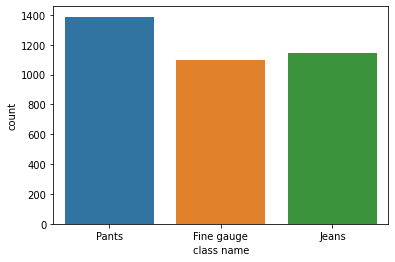

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(df2['class name'])
plt.xlabel('class name')

Data cukup balanced sehingga cocok digunakan sebagai klasifikasi

In [14]:
outfit = pd.get_dummies(df2['class name'])
fit = pd.concat([df2, outfit], axis=1)
fit = fit.drop(columns=['class name'])

In [15]:
fit

,review text,Fine gauge,Jeans,Pants
3,"i love, love, love this jumpsuit. it fun, fli...",0,0,1
15,i took these out of the package and wanted the...,0,0,1
16,material and color is nice. the leg opening i...,0,0,1
30,beautifully made pants and on trend with the f...,0,0,1
31,i never would have given these pants a second ...,0,0,1
...,...,...,...,...
23315,order yourself a pair today! my new favorite j...,0,1,0
23321,i got this in the blue and love it. tts and th...,1,0,0
23332,"so i typically avoid jumpsuits, rompers, etc. ...",0,0,1
23353,nice fabric and construction. the small fit me...,0,0,1


In [16]:
review = fit['review text'].values
label = fit[['Fine gauge', 'Jeans', 'Pants']].values

In [17]:
review

array(['i love, love, love this jumpsuit. it  fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!',
       'i took these out of the package and wanted them to fit so badly, but i could tell before i put them on that they would not . these are for an hour-glass figure. i am more straight up and down. the waist was way too small for my body shape and even if i sized up, i could tell they would still be tight in the waist and too roomy in the hips - for me. that said, they are really nice. sturdy, linen-like fabric, pretty color, well made. i hope they make someone very happy!',
       "material and color is nice.  the leg opening is very large.  i am 5'1 (100#) and the length hits me right above my ankle.  with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look.  if you are at least average height or taller, this may look good on you.",
       ...,
 

In [18]:
label

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [19]:
from sklearn.model_selection import train_test_split
review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.2, shuffle=True)

In [20]:
import numpy as np
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords

porterStemmer = PorterStemmer()

rev_train_texts = []
for text in review_train:
  removed_text = remove_stopwords(text)   
  removed_text = porterStemmer.stem_sentence(removed_text) 
  rev_train_texts.append(removed_text)

rev_train_texts = np.array(rev_train_texts, dtype='O')  

rev_test_texts = []
for text in review_test:
  removed_text = remove_stopwords(text)
  removed_text = porterStemmer.stem_sentence(removed_text)
  rev_test_texts.append(removed_text)

rev_test_texts = np.array(rev_test_texts, dtype='O')

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(rev_train_texts) 
tokenizer.fit_on_texts(rev_test_texts)
	 
seq_train = tokenizer.texts_to_sequences(rev_train_texts)
seq_test = tokenizer.texts_to_sequences(rev_test_texts)
	 
padded_train = pad_sequences(seq_train) 
padded_test = pad_sequences(seq_test)

word_to_index = tokenizer.word_index

In [22]:
len(word_to_index)

5950

In [113]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 32)          160000    
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                24832     
_________________________________________________________________
flatten_59 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               8320      
_________________________________________________________________
flatten_60 (Flatten)         (None, 128)               0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 128)             

In [114]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['acc'])

In [115]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=0.00001)

early_stopping_monitor = EarlyStopping(monitor = 'val_acc',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

In [116]:
hist = model.fit(padded_train,label_train,steps_per_epoch=25,epochs=50,validation_data=(padded_test, label_test),validation_steps=5,verbose=1, callbacks=[early_stopping_monitor,reduce_lr])

Epoch 1/50
25/25 [==============================] - 3s 136ms/step - loss: 1.0933 - acc: 0.3858 - val_loss: 1.0978 - val_acc: 0.3521
Epoch 2/50
25/25 [==============================] - 3s 122ms/step - loss: 1.0504 - acc: 0.4047 - val_loss: 0.9734 - val_acc: 0.4237
Epoch 3/50
25/25 [==============================] - 3s 123ms/step - loss: 0.7349 - acc: 0.7156 - val_loss: 0.6519 - val_acc: 0.7510
Epoch 4/50
25/25 [==============================] - 3s 121ms/step - loss: 0.3917 - acc: 0.8594 - val_loss: 0.5594 - val_acc: 0.7950
Epoch 5/50
25/25 [==============================] - 3s 123ms/step - loss: 0.2238 - acc: 0.9182 - val_loss: 0.6068 - val_acc: 0.7840
Epoch 6/50
25/25 [==============================] - 3s 125ms/step - loss: 0.1700 - acc: 0.9419 - val_loss: 0.5944 - val_acc: 0.7840
Epoch 7/50
25/25 [==============================] - 3s 123ms/step - loss: 0.1546 - acc: 0.9446 - val_loss: 0.5912 - val_acc: 0.8019
Epoch 8/50
25/25 [==============================] - 3s 123ms/step - loss: 0.

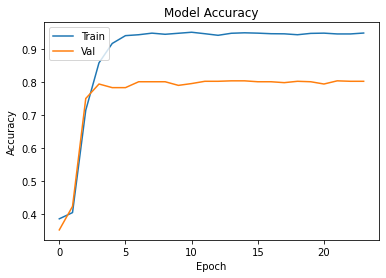

In [117]:
#Visualize the model accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

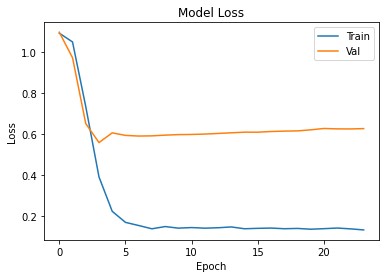

In [118]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()